In [1]:
%matplotlib inline


In [2]:
import numpy as np

In [3]:
! rio --help

Usage: rio [OPTIONS] COMMAND [ARGS]...

  Rasterio command line interface.

Options:
  -v, --verbose           Increase verbosity.
  -q, --quiet             Decrease verbosity.
  --aws-profile TEXT      Select a profile from the AWS credentials file
  --aws-no-sign-requests  Make requests anonymously
  --aws-requester-pays    Requester pays data transfer costs
  --version               Show the version and exit.
  --gdal-version
  --help                  Show this message and exit.

Commands:
  blocks     Write dataset blocks as GeoJSON features.
  bounds     Write bounding boxes to stdout as GeoJSON.
  calc       Raster data calculator.
  clip       Clip a raster to given bounds.
  convert    Copy and convert raster dataset.
  edit-info  Edit dataset metadata.
  env        Print information about the Rasterio environment.
  gcps       Print ground control points as GeoJSON.
  info       Print information about a data file.
  insp       Open a data file and start an interpreter.
  mask

In [4]:
%env CURL_CA_BUNDLE=/etc/ssl/certs/ca-certificates.crt


env: CURL_CA_BUNDLE=/etc/ssl/certs/ca-certificates.crt


In [5]:
%%bash

my_tif=/vsis3/ga-et-data/MODIS_NDVI/2016/2016001.1_km_16_days_NDVI.tif
rio info $my_tif --indent 2

{
  "blockxsize": 128,
  "blockysize": 128,
  "bounds": [
    -155.57238265799998,
    20.001584242744208,
    -52.209115508187494,
    49.999999996000085
  ],
  "colorinterp": [
    "gray"
  ],
  "count": 1,
  "crs": "EPSG:4326",
  "descriptions": [
    null
  ],
  "driver": "GTiff",
  "dtype": "float32",
  "height": 3108,
  "indexes": [
    1
  ],
  "interleave": "band",
  "lnglat": [
    -103.89074908309374,
    35.00079211937215
  ],
  "mask_flags": [
    [
      "nodata"
    ]
  ],
  "nodata": -3.4028234663852886e+38,
  "res": [
    0.00965199992061,
    0.00965199992061
  ],
  "shape": [
    3108,
    10709
  ],
  "tiled": true,
  "transform": [
    0.00965199992061,
    0.0,
    -155.57238265799998,
    0.0,
    -0.00965199992061,
    49.999999996000085,
    0.0,
    0.0,
    1.0
  ],
  "units": [
    null
  ],
  "width": 10709
}


In [6]:
%%bash

my_tif=/vsis3/ga-et-data/MODIS_NDVI/2016/2016001.1_km_16_days_NDVI.tif
rio bounds $my_tif --indent 2

{
  "bbox": [
    -155.57238265799998,
    20.001584242744208,
    -52.209115508187494,
    49.999999996000085
  ],
  "geometry": {
    "coordinates": [
      [
        [
          -155.57238265799998,
          20.001584242744208
        ],
        [
          -52.209115508187494,
          20.001584242744208
        ],
        [
          -52.209115508187494,
          49.999999996000085
        ],
        [
          -155.57238265799998,
          49.999999996000085
        ],
        [
          -155.57238265799998,
          20.001584242744208
        ]
      ]
    ],
    "type": "Polygon"
  },
  "properties": {
    "filename": "2016001.1_km_16_days_NDVI.tif",
    "id": "0",
    "title": "/vsis3/ga-et-data/MODIS_NDVI/2016/2016001.1_km_16_days_NDVI.tif"
  },
  "type": "Feature"
}


In [7]:
# cut and paste into geojson.io

In [8]:
!rio clip /vsis3/ga-et-data/MODIS_NDVI/2016/2016001.1_km_16_days_NDVI.tif output.tif --bounds '-75.15 39.96 -74.63 40.237'

Error: Could not open file : file exists and won't be overwritten without use of the `--overwrite` option.


In [9]:
!ls

00-bucket-ga-et-data-analysis.ipynb  80-play-with-rio.ipynb  output.tif
20-modis-scale-cole.ipynb	     POLYGON.shp
2016.out			     Readme.md


In [10]:
!gdalinfo output.tif

Driver: GTiff/GeoTIFF
Files: output.tif
Size is 54, 29
Coordinate System is:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0],
    UNIT["degree",0.0174532925199433],
    AUTHORITY["EPSG","4326"]]
Origin = (-75.150000000000006,40.237000000000002)
Pixel Size = (0.009651999920610,-0.009651999920610)
Metadata:
  AREA_OR_POINT=Area
Image Structure Metadata:
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  ( -75.1500000,  40.2370000) ( 75d 9' 0.00"W, 40d14'13.20"N)
Lower Left  ( -75.1500000,  39.9570920) ( 75d 9' 0.00"W, 39d57'25.53"N)
Upper Right ( -74.6287920,  40.2370000) ( 74d37'43.65"W, 40d14'13.20"N)
Lower Right ( -74.6287920,  39.9570920) ( 74d37'43.65"W, 39d57'25.53"N)
Center      ( -74.8893960,  40.0970460) ( 74d53'21.83"W, 40d 5'49.37"N)
Band 1 Block=256x256 Type=Float32, ColorInterp=Gray
  NoData Value=-3.4028234663852886e+38


In [11]:
import rasterio

tif_file = 'output.tif'



with rasterio.open(tif_file) as src:
    myThumb = src.read(1)

In [12]:
myThumb

array([[0.5839, 0.4726, 0.4726, ..., 0.4555, 0.4533, 0.4968],
       [0.4148, 0.2743, 0.2743, ..., 0.4494, 0.4675, 0.4051],
       [0.4565, 0.5702, 0.5702, ..., 0.4495, 0.4624, 0.4429],
       ...,
       [0.2019, 0.2005, 0.127 , ..., 0.4921, 0.5793, 0.6609],
       [0.1843, 0.1332, 0.1293, ..., 0.5895, 0.5252, 0.5228],
       [0.1164, 0.1507, 0.1856, ..., 0.5915, 0.5915, 0.6426]],
      dtype=float32)

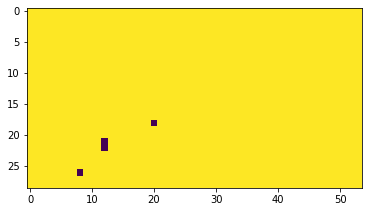

In [13]:
import matplotlib.pyplot as plt

plt.imshow(myThumb);  # Visualize a basic plot of the scaled EVI data

In [14]:
dir (myThumb)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__

In [15]:
myThumb.max()

0.7319

In [16]:
myThumb.min()

-3.4028235e+38

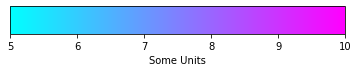

In [17]:
import matplotlib.pyplot as plt
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.cm.cool
norm = mpl.colors.Normalize(vmin=5, vmax=10)

cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')
cb1.set_label('Some Units')
fig.show()

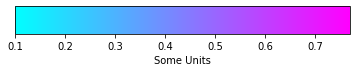

In [18]:
import matplotlib.pyplot as plt
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.cm.cool
norm = mpl.colors.Normalize(vmin=0.1, vmax=0.77)

cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')
cb1.set_label('Some Units')
fig.show()

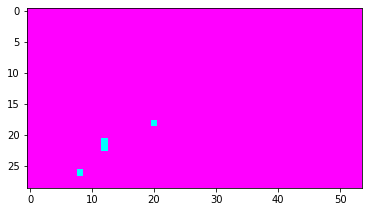

In [19]:
plt.imshow(myThumb, cmap=cmap);  # Visualize a basic plot of the scaled EVI data

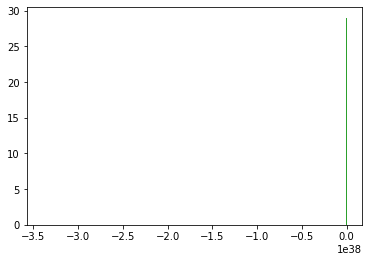

In [20]:
img = plt.hist(myThumb, bins=256)


In [21]:
img

([array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,

In [29]:
a = myThumb

In [30]:
a[(a < -2) | (a > 2)] = np.nan


In [31]:
a

array([[0.5839, 0.4726, 0.4726, ..., 0.4555, 0.4533, 0.4968],
       [0.4148, 0.2743, 0.2743, ..., 0.4494, 0.4675, 0.4051],
       [0.4565, 0.5702, 0.5702, ..., 0.4495, 0.4624, 0.4429],
       ...,
       [0.2019, 0.2005, 0.127 , ..., 0.4921, 0.5793, 0.6609],
       [0.1843, 0.1332, 0.1293, ..., 0.5895, 0.5252, 0.5228],
       [0.1164, 0.1507, 0.1856, ..., 0.5915, 0.5915, 0.6426]],
      dtype=float32)

In [32]:
b = a * 100

In [33]:
b

array([[58.39    , 47.260002, 47.260002, ..., 45.55    , 45.33    ,
        49.68    ],
       [41.48    , 27.43    , 27.43    , ..., 44.940002, 46.75    ,
        40.51    ],
       [45.649998, 57.020004, 57.020004, ..., 44.95    , 46.239998,
        44.29    ],
       ...,
       [20.19    , 20.05    , 12.700001, ..., 49.21    , 57.93    ,
        66.09    ],
       [18.43    , 13.320001, 12.93    , ..., 58.95    , 52.52    ,
        52.280003],
       [11.64    , 15.070001, 18.56    , ..., 59.149998, 59.149998,
        64.26    ]], dtype=float32)

In [35]:
c = b.astype(np.uint16)

In [36]:
c

array([[58, 47, 47, ..., 45, 45, 49],
       [41, 27, 27, ..., 44, 46, 40],
       [45, 57, 57, ..., 44, 46, 44],
       ...,
       [20, 20, 12, ..., 49, 57, 66],
       [18, 13, 12, ..., 58, 52, 52],
       [11, 15, 18, ..., 59, 59, 64]], dtype=uint16)

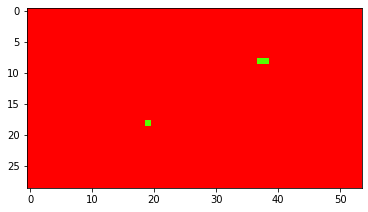

In [39]:
plt.imshow(c, cmap='prism');  # Visualize a basic plot of the scaled EVI data

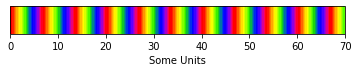

In [43]:
import matplotlib.pyplot as plt
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.cm.prism
norm = mpl.colors.Normalize(vmin=0, vmax=70)

cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')
cb1.set_label('Some Units')
fig.show()

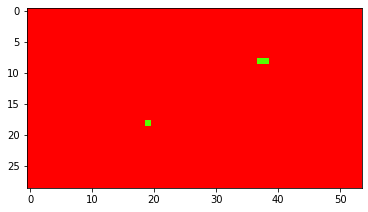

In [44]:
plt.imshow(c, cmap=cmap);  # Visualize a basic plot of the scaled EVI data

In [42]:
c.shape

(29, 54)

In [48]:
for row in range(29):
    print(row)
    for col in range(54):
        print(row,col)
        print(c[row,col])

0
0 0
58
0 1
47
0 2
47
0 3
55
0 4
60
0 5
57
0 6
57
0 7
52
0 8
58
0 9
56
0 10
56
0 11
53
0 12
68
0 13
72
0 14
67
0 15
67
0 16
61
0 17
40
0 18
50
0 19
50
0 20
55
0 21
58
0 22
41
0 23
54
0 24
50
0 25
49
0 26
51
0 27
57
0 28
57
0 29
50
0 30
61
0 31
60
0 32
53
0 33
62
0 34
59
0 35
54
0 36
54
0 37
45
0 38
35
0 39
28
0 40
25
0 41
26
0 42
23
0 43
32
0 44
44
0 45
44
0 46
42
0 47
43
0 48
43
0 49
42
0 50
41
0 51
45
0 52
45
0 53
49
1
1 0
41
1 1
27
1 2
27
1 3
49
1 4
67
1 5
56
1 6
50
1 7
57
1 8
42
1 9
69
1 10
69
1 11
60
1 12
62
1 13
63
1 14
66
1 15
67
1 16
72
1 17
49
1 18
53
1 19
53
1 20
53
1 21
56
1 22
49
1 23
52
1 24
56
1 25
49
1 26
58
1 27
49
1 28
49
1 29
47
1 30
60
1 31
56
1 32
58
1 33
58
1 34
59
1 35
56
1 36
56
1 37
54
1 38
48
1 39
29
1 40
17
1 41
23
1 42
24
1 43
27
1 44
41
1 45
41
1 46
46
1 47
42
1 48
43
1 49
47
1 50
53
1 51
44
1 52
46
1 53
40
2
2 0
45
2 1
57
2 2
57
2 3
57
2 4
59
2 5
46
2 6
41
2 7
49
2 8
57
2 9
63
2 10
65
2 11
65
2 12
66
2 13
64
2 14
64
2 15
68
2 16
71
2 17
66
2 18
63
2 19
63


37
21 6
37
21 7
22
21 8
31
21 9
26
21 10
22
21 11
21
21 12
0
21 13
30
21 14
30
21 15
36
21 16
31
21 17
35
21 18
39
21 19
37
21 20
39
21 21
42
21 22
52
21 23
52
21 24
38
21 25
60
21 26
47
21 27
50
21 28
46
21 29
46
21 30
43
21 31
71
21 32
71
21 33
68
21 34
58
21 35
58
21 36
56
21 37
58
21 38
46
21 39
42
21 40
44
21 41
44
21 42
48
21 43
44
21 44
40
21 45
46
21 46
45
21 47
44
21 48
63
21 49
57
21 50
57
21 51
49
21 52
54
21 53
61
22
22 0
24
22 1
17
22 2
24
22 3
13
22 4
33
22 5
21
22 6
21
22 7
23
22 8
33
22 9
9
22 10
17
22 11
17
22 12
0
22 13
38
22 14
44
22 15
44
22 16
46
22 17
40
22 18
36
22 19
38
22 20
48
22 21
49
22 22
45
22 23
45
22 24
43
22 25
45
22 26
57
22 27
54
22 28
46
22 29
36
22 30
30
22 31
48
22 32
48
22 33
57
22 34
60
22 35
47
22 36
53
22 37
52
22 38
48
22 39
46
22 40
44
22 41
44
22 42
61
22 43
58
22 44
55
22 45
50
22 46
44
22 47
48
22 48
61
22 49
56
22 50
56
22 51
53
22 52
53
22 53
54
23
23 0
15
23 1
13
23 2
31
23 3
18
23 4
13
23 5
14
23 6
14
23 7
16
23 8
16
23 9
16
23 10
22
2

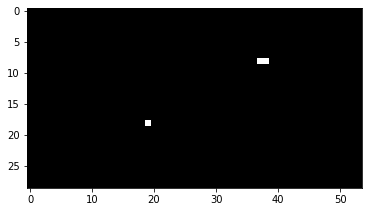

In [50]:
plt.imshow(c, cmap='gray');  # Visualize a basic plot of the scaled EVI data

In [51]:
d = c.astype(np.uint8)

In [52]:
d

array([[58, 47, 47, ..., 45, 45, 49],
       [41, 27, 27, ..., 44, 46, 40],
       [45, 57, 57, ..., 44, 46, 44],
       ...,
       [20, 20, 12, ..., 49, 57, 66],
       [18, 13, 12, ..., 58, 52, 52],
       [11, 15, 18, ..., 59, 59, 64]], dtype=uint8)

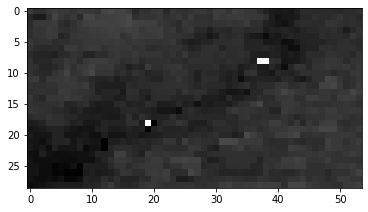

In [53]:
plt.imshow(d, cmap='gray');  # Visualize a basic plot of the scaled EVI data

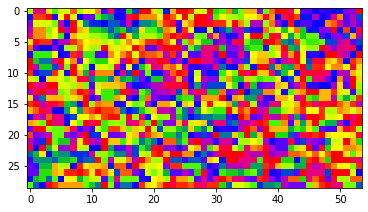

In [54]:
plt.imshow(d, cmap=cmap);  # Visualize a basic plot of the scaled EVI data

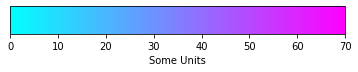

In [55]:
import matplotlib.pyplot as plt
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.cm.cool
norm = mpl.colors.Normalize(vmin=0, vmax=70)

cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')
cb1.set_label('Some Units')
fig.show()

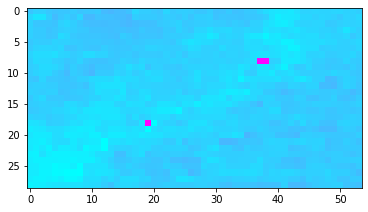

In [56]:
plt.imshow(d, cmap=cmap);  # Visualize a basic plot of the scaled EVI data

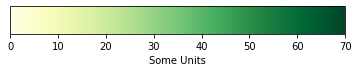

In [57]:
import matplotlib.pyplot as plt
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.cm.YlGn
norm = mpl.colors.Normalize(vmin=0, vmax=70)

cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')
cb1.set_label('Some Units')
fig.show()

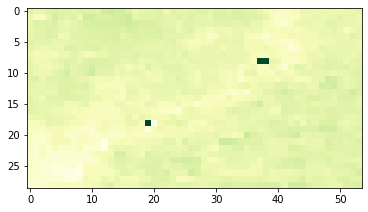

In [58]:
plt.imshow(d, cmap=cmap);  # Visualize a basic plot of the scaled EVI data